# **K-Nearest Neighbors**

In this exercise, you will build a classifier using the K-Nearest Neighbors algorithm.

---

### **1. Generating data**

You will start by generating synthetic data for this problem.  

- Generate a dataset with **n = 50 points** in a unit square. Each point should have an assigned label: orange or blue.  
  - Think about the rules to assign the labels (hint: you need a boundary rule to classify points as orange or blue).  
  - Store the x and y coordinates, along with the label, in a structured format.  
  - Vizualize the dataset.

---

### **2. The algorithm**

You will now use your generated dataset to determine the label of a new observation **(x₀, y₀)**. Here are the steps you should follow :

- Compute the distances between **(x₀, y₀)** and all points in your dataset.  
  - How will you calculate the distance ? 
  - What type of distance metric can you use ?  

- Select a value for **K**

- Identify the **K nearest neighbors** for your new point based on the distances you computed.  

- Based on the labels of the nearest neighbors, how would you decide the predicted class for the new observation ? Do it and explain your approach.

- Experiment with different values of **K** :  
  - Analyze how the prediction changes depending on different values for **K**.  
  - What happens when **K** is too small ? Too large ?

---

### **3. More complex dataset**

- Implement the K-Nearest Neighbors algorithm for datasets with more complicated shapes (generate these data, you can use your creativity).  
  - What happens to your prediction as the dataset structure becomes more complex ?

- Test your implementation by generating a random test set with new points. Measure how well your algorithm performs (e.g., accuracy, precision, recall).  

- Try using a different distance metric (e.g., Manhattan distance) to see how it impacts classification. Which metric feels more appropriate for your specific problem ?

---



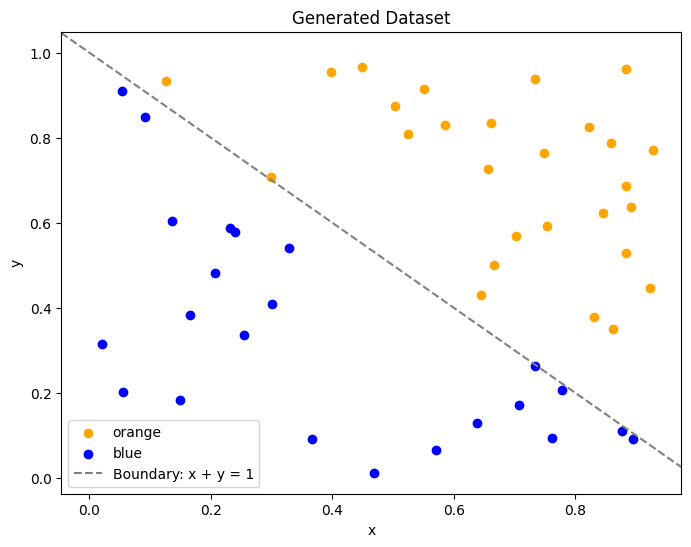

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n = 50
x = np.random.rand(n)
y = np.random.rand(n)

labels = np.where(x + y >1, 'orange', 'blue')

data = pd.DataFrame({'x': x, 'y': y, 'label': labels})

plt.figure(figsize=(8, 6))
for label, color in [('orange', 'orange'), ('blue', 'blue')]:
    subset = data[data['label'] == label]
    plt.scatter(subset['x'], subset['y'], label=label, color=color)
plt.axline((0, 1), slope= -1, color='gray', linestyle='--', label='Boundary: x + y = 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Dataset')
plt.legend()
plt.show()

K=1, Predicted class: orange
K=3, Predicted class: blue
K=5, Predicted class: blue
K=10, Predicted class: blue


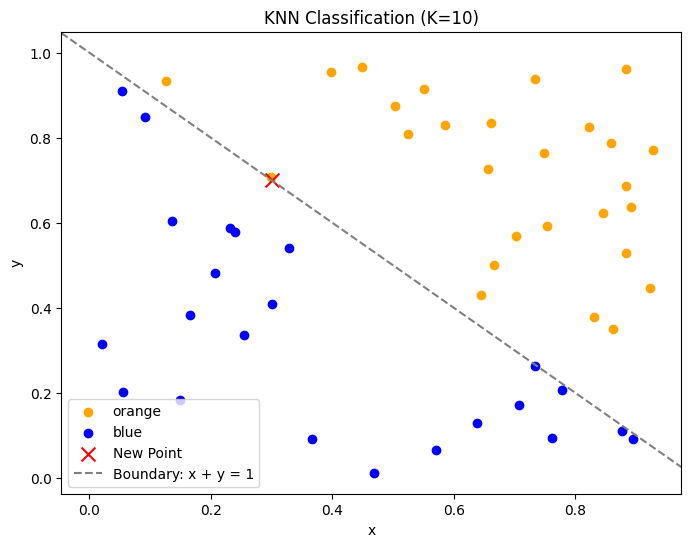

In [4]:
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# KNN Classification
def knn_classification(x0, y0, data, K=3):
    distances = []
    for i in range(len(data)):
        dist = euclidean_distance(x0, y0, data.iloc[i]['x'], data.iloc[i]['y'])
        distances.append((dist, data.iloc[i]['label']))
    
    # Sort by distance
    distances.sort(key=lambda x: x[0])
    
    # Get K nearest labels
    k_nearest_labels = [label for _, label in distances[:K]]
    
    # Majority vote
    predicted_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
    
    return predicted_label

# Test with a new point
x0, y0 = 0.3, 0.7  
K_values = [1, 3, 5, 10]

for K in K_values:
    predicted_class = knn_classification(x0, y0, data, K)
    print(f"K={K}, Predicted class: {predicted_class}")

# Visualization
plt.figure(figsize=(8, 6))
for label, color in [('orange', 'orange'), ('blue', 'blue')]:
    subset = data[data['label'] == label]
    plt.scatter(subset['x'], subset['y'], label=label, color=color)

# Plot the new point
plt.scatter(x0, y0, color='red', marker='x', s=100, label="New Point")

plt.axline((0, 1), slope=-1, color='gray', linestyle='--', label='Boundary: x + y = 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'KNN Classification (K={K})')
plt.legend()
plt.show()

K=1: Accuracy=0.95, Precision=0.94, Recall=0.97
K=3: Accuracy=0.98, Precision=0.97, Recall=1.00
K=5: Accuracy=0.98, Precision=0.97, Recall=1.00
K=10: Accuracy=0.98, Precision=0.97, Recall=1.00


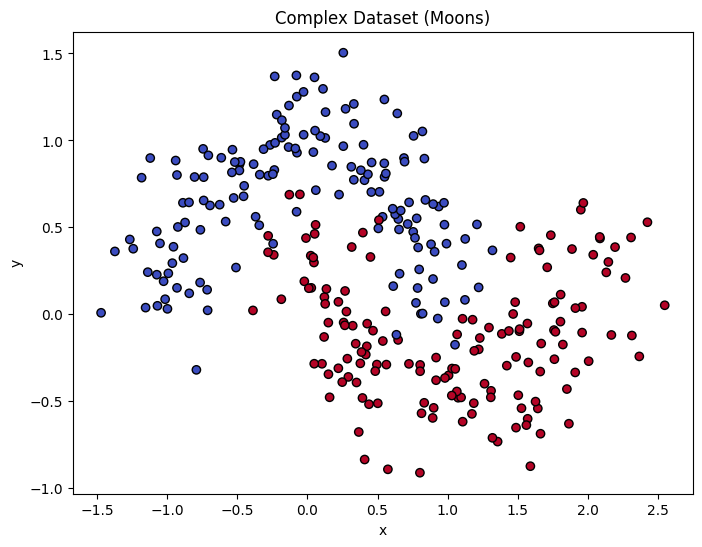

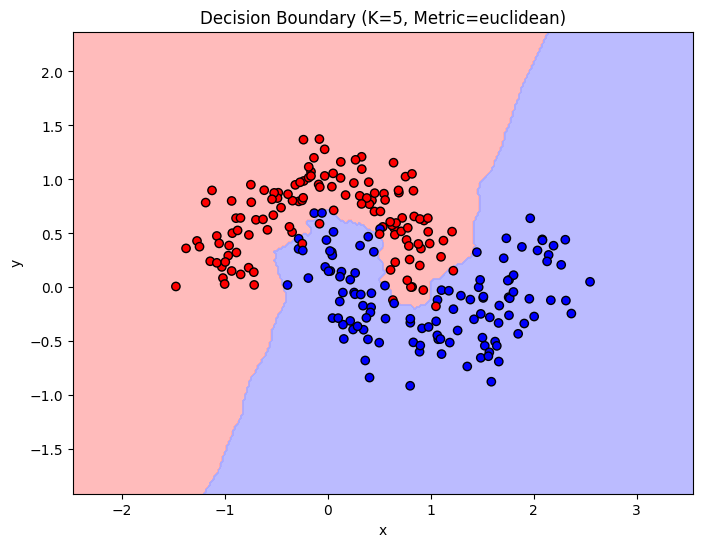

Euclidean distance is more appropriate for this problem as it captures the geometric relationships in the dataset.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import make_moons, make_blobs
from collections import Counter

X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

data = pd.DataFrame({'x': X[:, 0], 'y': X[:, 1], 'label': y})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))
def knn_predict(X_train, y_train, X_test, K=5, metric='euclidean'):
        predictions = []
        for test_point in X_test:
            distances = []
            for idx, train_point in enumerate(X_train):  # Using enumerate to get index and train_point
                # Calculate distance based on the specified metric
                if metric == 'euclidean':
                    dist = euclidean_distance(train_point, test_point)
                elif metric == 'manhattan':
                    dist = manhattan_distance(train_point, test_point)
                distances.append((dist, y_train[idx]))  # Use idx to access the corresponding label

            # Sort distances in ascending order
            distances.sort(key=lambda x: x[0])

            # Extract the labels of the K nearest neighbors
            k_nearest_labels = [label for _, label in distances[:K]]

            # Determine the most common label (majority vote)
            predicted_label = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(predicted_label)

        return np.array(predictions)
    
K_values = [1, 3, 5, 10]
for K in K_values:
    y_pred = knn_predict(X_train, y_train, X_test, K=K, metric='euclidean')
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"K={K}: Accuracy={acc:.2f}, Precision={precision:.2f}, Recall={recall:.2f}")

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(data['x'], data['y'], c=data['label'], cmap='coolwarm', edgecolors='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Complex Dataset (Moons)')
plt.show()
# Choosing the appropriate metric
# For this specific problem, Euclidean distance is more appropriate because it considers the geometric distance
# between points in a 2D space, which aligns well with the nature of the dataset (moons).
# As the dataset structure becomes more complex, the decision boundary created by KNN becomes less smooth and more sensitive to noise. 
# This is because KNN relies on local information, and complex structures may lead to overfitting, especially for small values of K.

# To visualize this, let's plot the decision boundary for the complex dataset:

def plot_decision_boundary(X_train, y_train, K, metric='euclidean'):
    h = 0.02  # step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict labels for each point in the mesh
    Z = knn_predict(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], K=K, metric=metric)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolor='k')
    plt.title(f"Decision Boundary (K={K}, Metric={metric})")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Example: Plot decision boundary for K=5
plot_decision_boundary(X_train, y_train, K=5, metric='euclidean')
print("Euclidean distance is more appropriate for this problem as it captures the geometric relationships in the dataset.")


---
---

# **Support Vector Machine**

A dataset contains two classes: Class A ($y=+1$ ) and Class B ($y=-1$). Your goal is to:

You are given six labeled data points in a 2D space:

| Point $ x_i $     | Label $ y_i $  |
|-------------------|---------------|
| $ x_1 = [2, 3] $   | $ +1 $         |
| $ x_2 = [1, 2] $   | $ +1 $         |
| $ x_3 = [3, 1] $   | $ +1 $         |
| $ x_4 = [1, 0] $   | $ -1 $         |
| $ x_5 = [2, -1] $  | $ -1 $         |
| $ x_6 = [0, 0] $   | $ -1 $         |

---

### **1. Sketch & intuition**
- **1.1:** Plot the six points on a 2D graph with $ x_1 $ -$ x_2 $  axes. Do the two classes form distinct clusters ?
- **1.2:** What does it mean for the two classes to be linearly separable ? What would this imply about the complexity of the classification problem ?
- **1.3:** Are the two classes linearly separable ? If yes, arbitrarily sketch a decision boundary (no need to optimize it yet).
- **1.4:** What is the margin in the context of a decision boundary?
- **1.5:** Why would we like to maximize the margin ? What might happen if the margin is very small ? (think about new observations and future predictions)

---

### **2. Decision Boundary for Hard-Margin**
The decision boundary for an SVM is represented as:

$$
x^T \beta + \beta_0 = 0, \quad \text{where } \beta = [\beta_1, \beta_2]^T \text{are some weights}, \text{ and } \beta_0 \text{ is the intercept.}
$$

- **2.1:** Write down the margin constraints:

$$
y_i (\beta^T x_i + \beta_0) \geq 1
$$

For each observation ($ x_1, x_2, ..., x_6 $ ), substitute $x_i$  and $y_i$  into the inequality.

- **2.2** What does the margin constraint enforce for a correctly classified point ? Explain what this constraint means for points with $y_i=+1$ and $y_i=−1$.

- **2.3** Lets say our solver choose random initial values to specify a decision boundary:
    - $\beta = [1, -1]^T$ 
    - $\beta_0 = 0$

Verify step by step, whether the margin constraint is satisfied for each observation ($x_1, x_2, \ldots, x_6$ ) given their respective labels ($y_1, y_2, \ldots, y_6$ ). Sketch the decision line.

- **2.4** At the second iteration, our solver updates the parameters : $\beta = [2, 2]^T$ & $\beta_0 = -4$. Check again the conditions for each observations and draw the line. Does the margin look to be maximized here ? Compute its lenght :  $$M = \frac{1}{||\beta||}$$,
where $ ||\beta|| = \sqrt{\beta_1^2 + \beta_2^2} $ .



- **2.5: Using sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), write a code to find the decision line that maximize the margin. What are the estimated parameters ? Plot the line.**
    (Hint : use the linear kernel parameter)



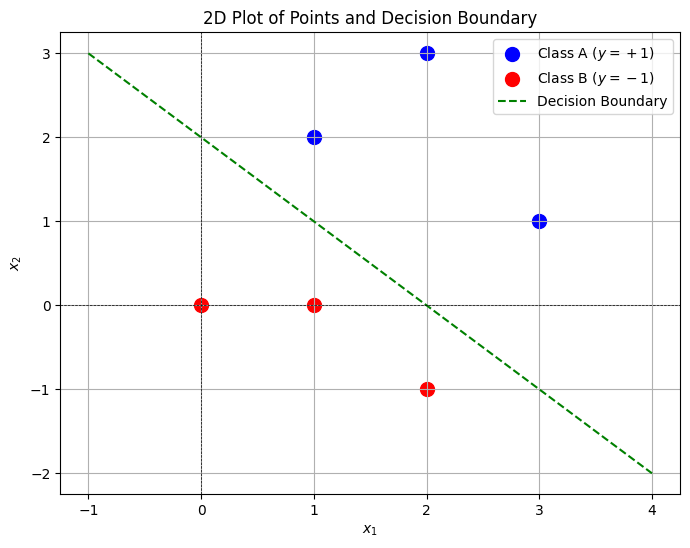

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

points = np.array([[2, 3], [1, 2], [3, 1], [1, 0], [2, -1], [0, 0]])
labels = np.array([1, 1, 1, -1, -1, -1])

# Separate points by class
class_A = points[labels == 1]
class_B = points[labels == -1]

# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(class_A[:, 0], class_A[:, 1], color='blue', label='Class A ($y=+1$)', s=100)
plt.scatter(class_B[:, 0], class_B[:, 1], color='red', label='Class B ($y=-1$)', s=100)

# Sketch an arbitrary decision boundary
x_boundary = np.linspace(-1, 4, 100)
y_boundary = -x_boundary + 2  # Example decision boundary: x1 + x2 = 2
plt.plot(x_boundary, y_boundary, color='green', linestyle='--', label='Decision Boundary')

# Add labels and legend
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('2D Plot of Points and Decision Boundary')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

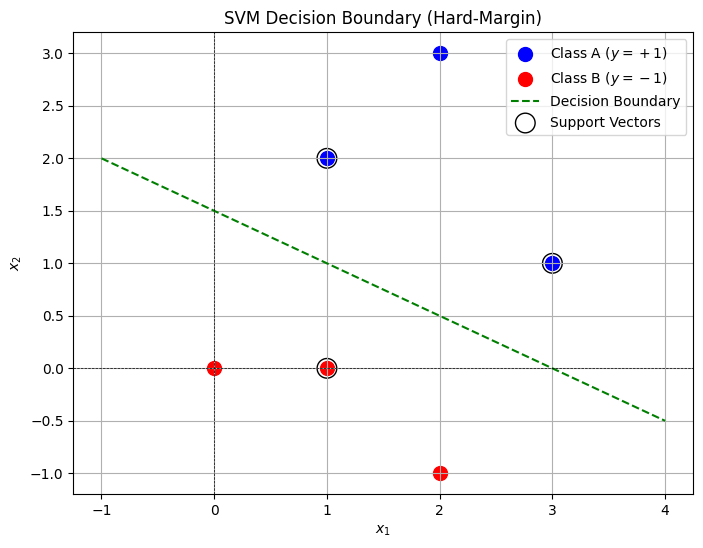

Estimated beta: [0.49984 0.99968]
Estimated beta_0: -1.4994133333333337
Margin length: 0.89


In [11]:
from sklearn.svm import SVC
import numpy as np

import matplotlib.pyplot as plt

# Define the points and labels
points = np.array([[2, 3], [1, 2], [3, 1], [1, 0], [2, -1], [0, 0]])
labels = np.array([1, 1, 1, -1, -1, -1])

# Train the SVM with a linear kernel
svm = SVC(kernel='linear', C=1e10)  # Large C for hard-margin SVM
svm.fit(points, labels)

# Extract the parameters
beta = svm.coef_[0]
beta_0 = svm.intercept_[0]

# Compute the decision boundary
x_boundary = np.linspace(-1, 4, 100)
y_boundary = -(beta[0] * x_boundary + beta_0) / beta[1]

# Plot the points and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(points[labels == 1][:, 0], points[labels == 1][:, 1], color='blue', label='Class A ($y=+1$)', s=100)
plt.scatter(points[labels == -1][:, 0], points[labels == -1][:, 1], color='red', label='Class B ($y=-1$)', s=100)
plt.plot(x_boundary, y_boundary, color='green', linestyle='--', label='Decision Boundary')

# Highlight the support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k', label='Support Vectors')

# Add labels and legend
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('SVM Decision Boundary (Hard-Margin)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

# Print the parameters
print(f"Estimated beta: {beta}")
print(f"Estimated beta_0: {beta_0}")
print(f"Margin length: {1 / np.linalg.norm(beta):.2f}")


---

### **3. Slack Variables for a Soft-Margin**
In real-world datasets, perfect separation might not be possible as the data might be mixed. 

Lets add two new observations : 
- $ x_7 = [1, 3] $  with $y_7 = +1 $
- $ x_8 = [3, -2] $  with $y_8 = -1 $


Slack variables ($ \xi_i $ ) can be added to relax the SVM constraint for incorrectly classified or margin-violating points:

$$

y_i (\beta^T x_i + \beta_0) \geq 1 - \xi_i, \quad \xi_i \geq 0

$$


They are computed by the Hinge Loss function:

$$
\xi_i = \max(0, 1 - y_i (\beta^T x_i + \beta_0))
$$

- **3.1: Check for each observation if the point violates the soft-margin constraint. Compute the slack variable $ \xi_i $  for each point.**


- **3.2: What is the slack variable when the observation is well classified ?**

- **3.3: Identify the points that violate the margin.**

- **3.3: Compute the total violation:**

$$

\text{Total Slack:} \quad \sum_{i=1}^n \xi_i.

$$

---

### **4. Adding Slack Variables to the Objective Function**

The objective function that we used for the hard margin can be modified to include the penalty term for the slack variables. By doing so, our final problem is :

$$
 \text{minimize} \quad \frac{1}{2} \|\beta\|^2 + C \sum_{i=1}^{n} \xi_i 
$$

subject to :

$$
 y_i (\beta \cdot x_i + b) \geq 1 - \xi_i \quad \forall i 
$$



$$
 \xi_i \geq 0 \quad \forall i 
$$

Where, 

1. $ \frac{1}{2} \|\beta\|^2 $ encourages a large margin by minimizing the norm of the weight vector.
2. $C \sum_{i=1}^{n} \xi_i$ penalizes the slack variables. $C$  is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.
3. $ y_i (\beta \cdot x_i + b) \geq 1 - \xi_i $ : This constraint allows for some points to be within the margin or misclassified, thanks to the slack variable.
4. $ \xi_i \geq 0 $ : Ensures that slack variables are non-negative.

By adding slack variables to the objective function, the soft margin SVM can handle non-separable data more effectively, balancing the need for a large margin with the practical reality of misclassifications.

- **4. How does increasing or decreasing C affect the trade-off between maximizing the margin and minimizing classification errors ?**

---


In [14]:
# Define the new observations
points = np.array([[2, 3], [1, 2], [3, 1], [1, 0], [2, -1], [0, 0], [1, 3], [3, -2]])
labels = np.array([1, 1, 1, -1, -1, -1, 1, -1])

# Combine the new points with the existing points
all_points = np.vstack([points, points])
all_labels = np.hstack([labels, labels])

# Compute the slack variables
slack_variables = []
for i in range(len(all_points)):
    x_i = all_points[i]
    y_i = all_labels[i]
    margin = y_i * (np.dot(beta, x_i) + beta_0)
    slack = max(0, 1 - margin)
    slack_variables.append(slack)

# Identify points that violate the margin
violating_points = [i for i, slack in enumerate(slack_variables) if slack > 0]

# Compute the total slack
total_slack = sum(slack_variables)

# Print results
print("Slack variables for each point:", slack_variables)
print("Points that violate the margin:", violating_points)
print("Total Slack:", total_slack)

Slack variables for each point: [0, 0.0002133333333336207, 0.0002133333333336207, 0.0004266666666663532, 0, 0, 0, 0, 0, 0.0002133333333336207, 0.0002133333333336207, 0.0004266666666663532, 0, 0, 0, 0]
Points that violate the margin: [1, 2, 3, 9, 10, 11]
Total Slack: 0.0017066666666671892


In [15]:
# Calculate the hinge loss for each point in the test set
hinge_losses = []
for i in range(len(X_test)):
    x_i = X_test[i]
    y_i = y_test[i]
    margin = y_i * (np.dot(beta, x_i) + beta_0)
    hinge_loss = max(0, 1 - margin)
    hinge_losses.append(hinge_loss)

# Compute the total hinge loss
total_hinge_loss = sum(hinge_losses)

# Print results
print("Hinge losses for each test point:", hinge_losses)
print("Total hinge loss:", total_hinge_loss)

Hinge losses for each test point: [2.5848437143201606, 0.7579986654381954, 2.66215225137427, 2.3451277249234272, 2.196669926577365, 1.0, 0.9234259735185064, 1.0, 2.3474962032759583, 2.323506476954691, 1.0, 1.0, 2.0116342774316123, 1.0, 1.2964829810761649, 1.5086919643007175, 1.0, 1.304423916346802, 1.0, 1.0, 1.0, 2.2850521743379595, 1.0, 1.0, 1.7629386765822792, 1.477547584137011, 1.0, 2.3601738622048685, 1.0, 1.768525029581372, 2.4228308411071504, 1.0, 1.0, 1.0, 1.0, 2.2900193002869873, 1.0, 2.541251671402571, 2.485915095820816, 2.3846043288698517, 2.021523056180282, 1.0, 1.0, 2.2958827020679635, 1.0, 2.3766859414132755, 2.6127360013824843, 2.7974689480115194, 1.8773307416531648, 2.5504508419232814, 2.5240207404995365, 3.1044194867025094, 2.4521731740516177, 1.2373203755674576, 1.0, 1.0, 1.0, 1.0, 2.1150340924719035, 1.0]
Total hinge loss: 98.00635874179372


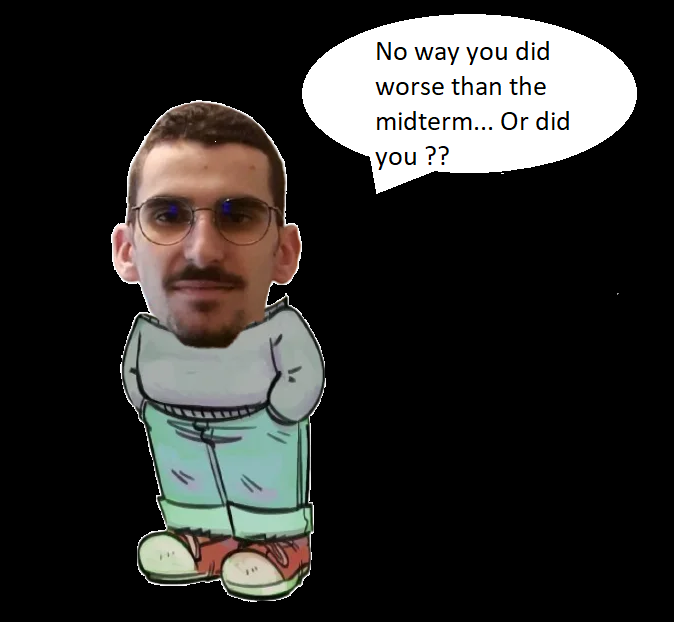